# Sharing pretrained models (PyTorch)

Install the Transformers, Datasets, and Evaluate libraries to run this notebook.

In [1]:
%%capture
!pip install datasets evaluate transformers[sentencepiece]
!apt install git-lfs
!pip install transformers[torch] -U
!pip install accelerate -U

You will need to setup git, adapt your email and name in the following cell.

In [2]:
!git config --global user.email "mskehoe001@gmail.com"
!git config --global user.name "Matthew Kehoe"

In the steps below, we'll take a look at the easiest ways to share pretrained models to the 🤗 Hub. There are tools and utilities available that make it simple to share and update models directly on the Hub, which we will explore below.

We encourage all users that train models to contribute by sharing them with the community — sharing models, even when trained on very specific datasets, will help others, saving them time and compute resources and providing access to useful trained artifacts. In turn, you can benefit from the work that others have done!

There are three ways to go about creating new model repositories:

- Using the `push_to_hub` API
- Using the `huggingface_hub` Python library
- Using the web interface

Once you've created a repository, you can upload files to it via git and git-lfs. We'll walk you through creating model repositories and uploading files to them in the following sections.

### Using the push_to_hub API

The simplest way to upload files to the Hub is by leveraging the `push_to_hub` API.

Before going further, you'll need to generate an authentication token so that the `huggingface_hub` API knows who you are and what namespaces you have write access to. Make sure you are in an environment where you have transformers installed (see [Setup](https://huggingface.co/course/chapter0)). If you are in a notebook, you can use the following function to login:

In [3]:
from huggingface_hub import notebook_login

notebook_login()

You should be prompted for your username and password, which are the same ones you use to log in to the Hub. If you do not have a Hub profile yet, you should create one [here](https://huggingface.co/join).

Great! You now have your authentication token stored in your cache folder. Let's create some repositories!

If you have played around with the Trainer API to train a model, the easiest way to upload it to the Hub is to set `push_to_hub=True` when you define your TrainingArguments:

In [4]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    "bert-finetuned-mrpc", save_strategy="epoch", push_to_hub=True
)

When you call `trainer.train()`, the Trainer will then upload your model to the Hub each time it is saved (here every epoch) in a repository in your namespace. That repository will be named like the output directory you picked (here `bert-finetuned-mrpc`) but you can choose a different name with `hub_model_id = "a_different_name"`.

To upload your model to an organization you are a member of, just pass it with `hub_model_id = "my_organization/my_repo_name"`.

Once your training is finished, you should do a final `trainer.push_to_hub()` to upload the last version of your model. It will also generate a model card with all the relevant metadata, reporting the hyperparameters used and the evaluation results! Here is an example of the content you might find in a such a model card:

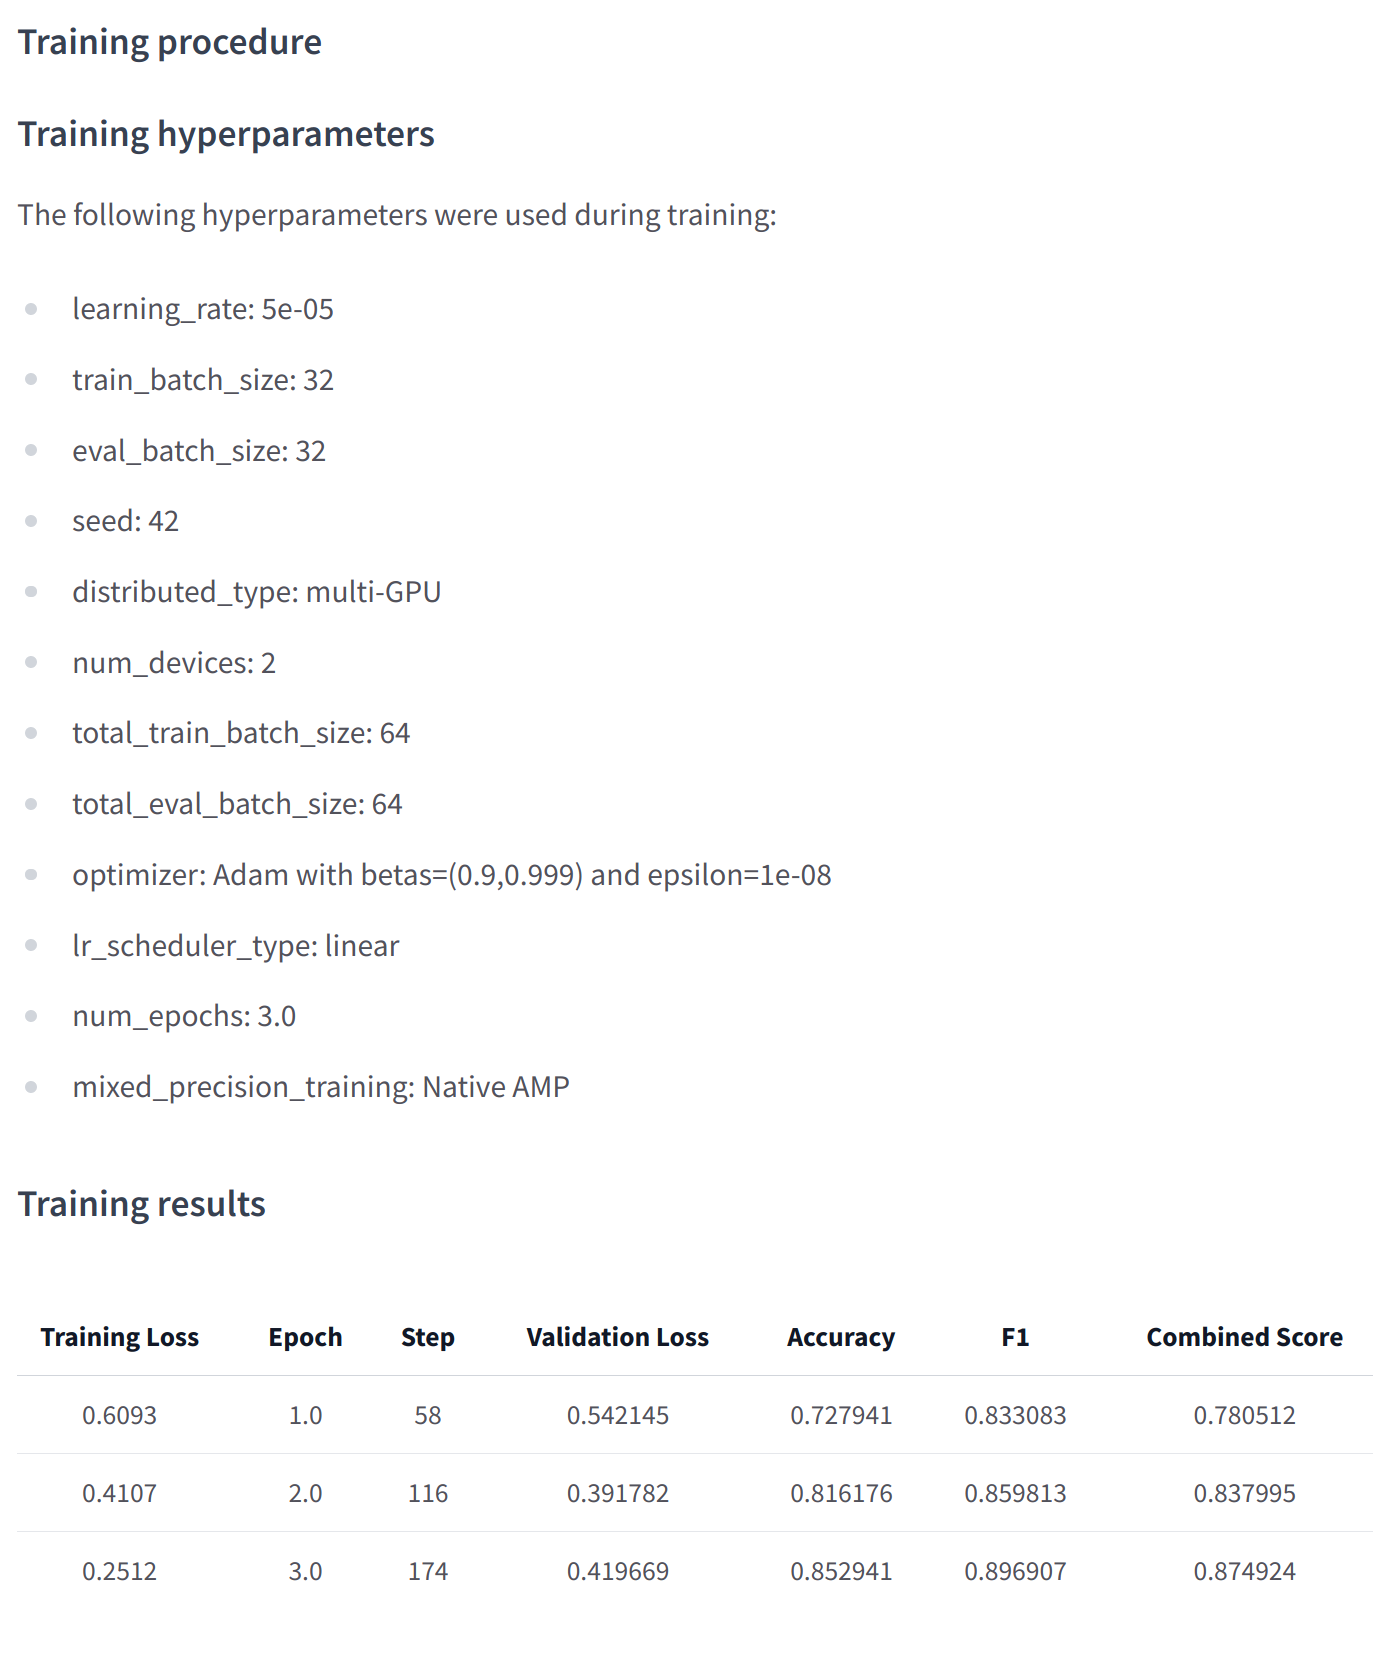

At a lower level, accessing the Model Hub can be done directly on models, tokenizers, and configuration objects via their `push_to_hub()` method. This method takes care of both the repository creation and pushing the model and tokenizer files directly to the repository. No manual handling is required, unlike with the API we'll see below.

To get an idea of how it works, let's first initialize a model and a tokenizer:

In [5]:
from transformers import AutoModelForMaskedLM, AutoTokenizer

checkpoint = "camembert-base"

model = AutoModelForMaskedLM.from_pretrained(checkpoint)
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the model checkpoint at camembert-base were not used when initializing CamembertForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing CamembertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

You're free to do whatever you want with these — add tokens to the tokenizer, train the model, fine-tune it. Once you're happy with the resulting model, weights, and tokenizer, you can leverage the `push_to_hub()` method directly available on the model object:

In [7]:
model.push_to_hub("dummy-model")

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Axion004/dummy-model/commit/52b7ac158236410beecfe026e56c2d922ae0ad4e', commit_message='Upload CamembertForMaskedLM', commit_description='', oid='52b7ac158236410beecfe026e56c2d922ae0ad4e', pr_url=None, pr_revision=None, pr_num=None)

This will create the new repository `dummy-model` in your profile, and populate it with your model files. Do the same with the tokenizer, so that all the files are now available in this repository:

In [8]:
tokenizer.push_to_hub("dummy-model")

CommitInfo(commit_url='https://huggingface.co/Axion004/dummy-model/commit/a99cea5ef01fe5f9cca1c463eb03e6730784e628', commit_message='Upload tokenizer', commit_description='', oid='a99cea5ef01fe5f9cca1c463eb03e6730784e628', pr_url=None, pr_revision=None, pr_num=None)

If you belong to an organization, simply specify the `organization` argument to upload to that organization's namespace:

In [9]:
#tokenizer.push_to_hub("dummy-model", organization="huggingface")

If you wish to use a specific Hugging Face token, you're free to specify it to the `push_to_hub()` method as well:

In [10]:
#tokenizer.push_to_hub("dummy-model", use_auth_token="<TOKEN>")

Now head to the Model Hub to find your newly uploaded model: https://huggingface.co/user-or-organization/dummy-model.

Click on the “Files and versions” tab, and you should see the files visible in the following screenshot:

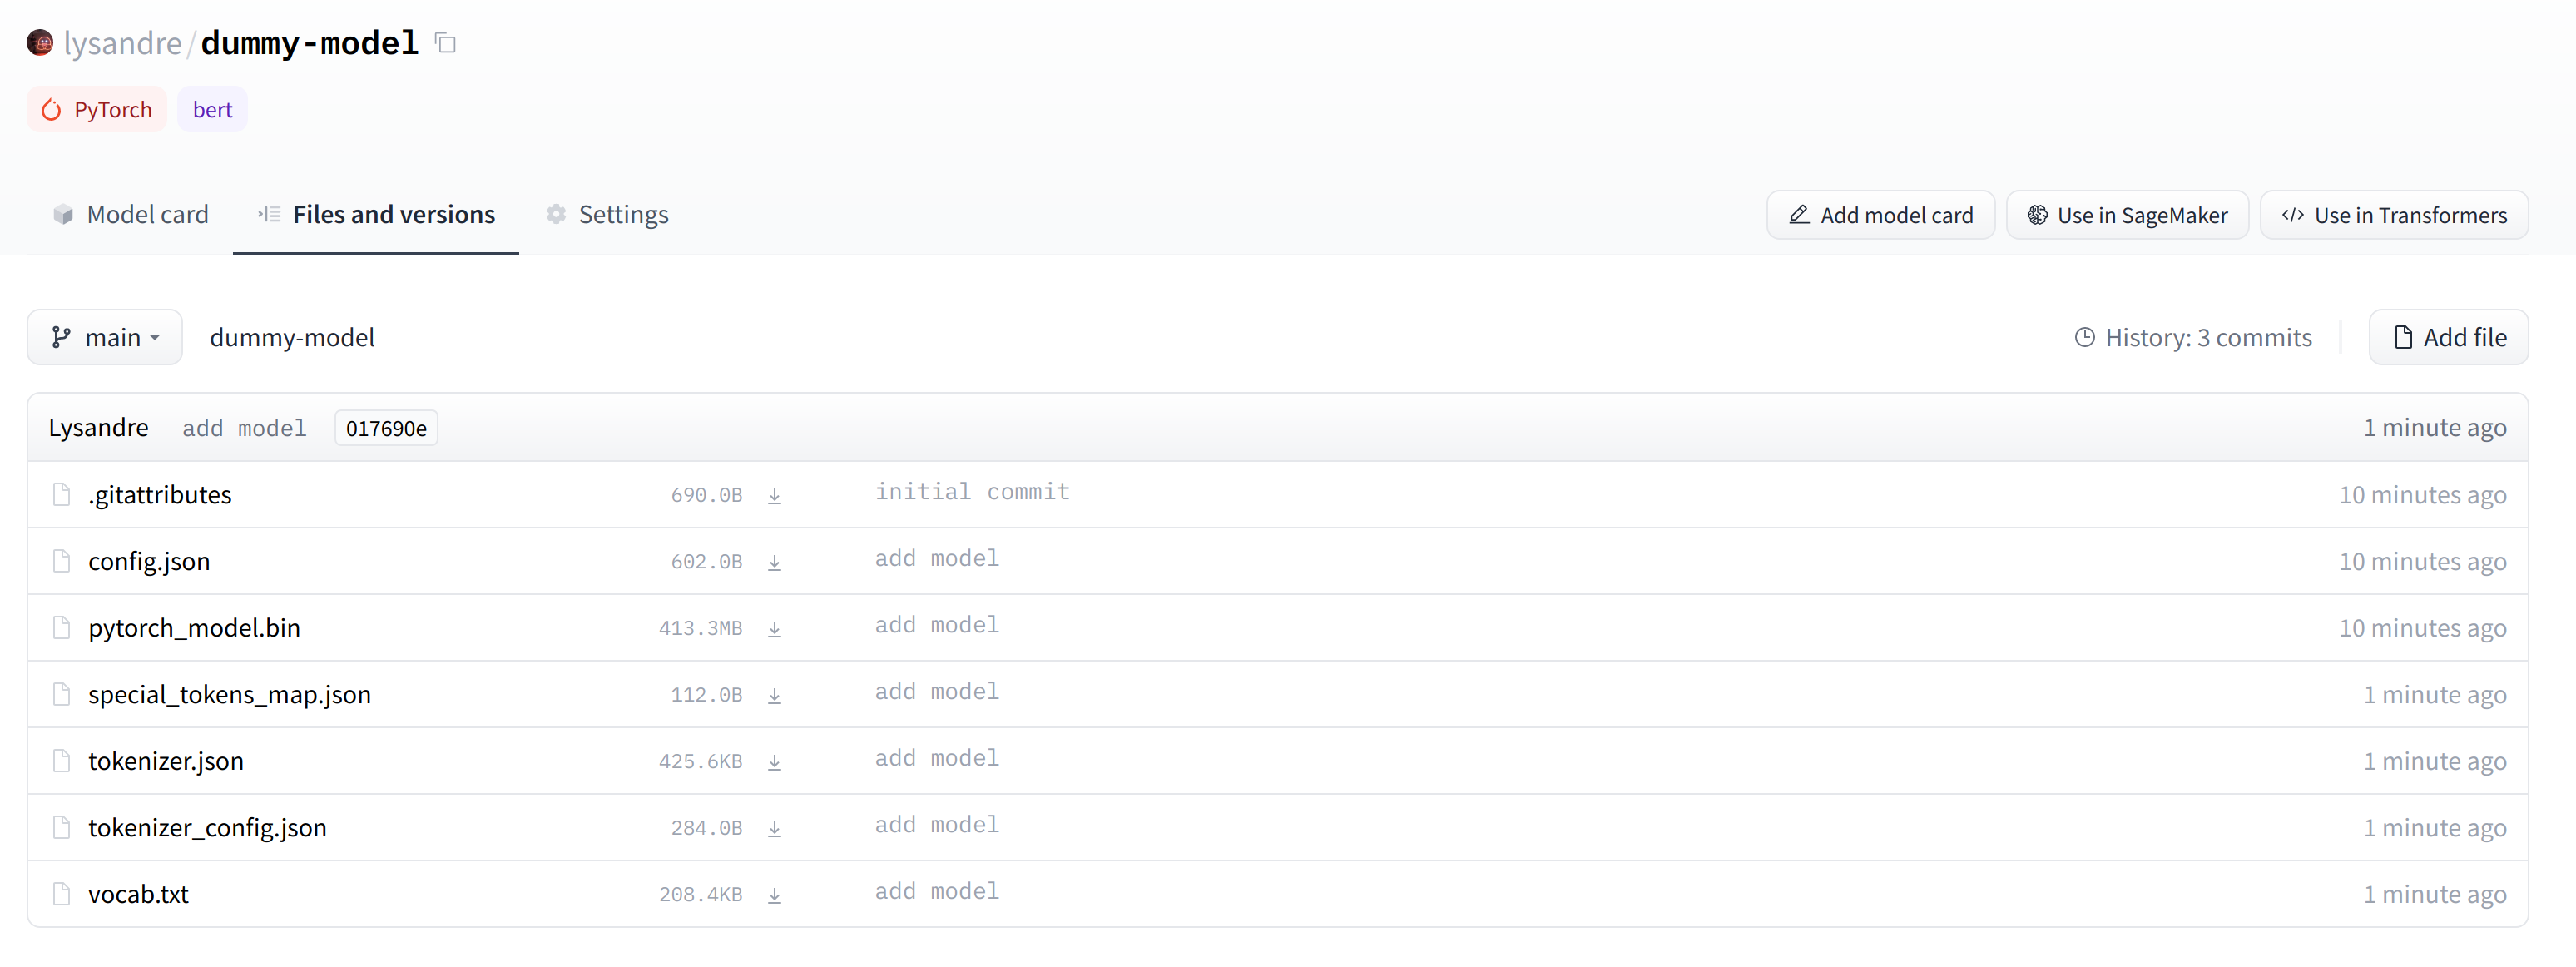

As you've seen, the `push_to_hub()` method accepts several arguments, making it possible to upload to a specific repository or organization namespace, or to use a different API token. We recommend you take a look at the method specification available directly in the [🤗 Transformers documentation](https://huggingface.co/transformers/model_sharing) to get an idea of what is possible.

The `push_to_hub()` method is backed by the [huggingface_hub](https://github.com/huggingface/huggingface_hub) Python package, which offers a direct API to the Hugging Face Hub. It’s integrated within 🤗 Transformers and several other machine learning libraries, like [allenlp](https://github.com/allenai/allennlp). Although we focus on the 🤗 Transformers integration in this chapter, integrating it into your own code or library is simple.

Jump to the last section to see how to upload files to your newly created repository!

### Using the huggingface_hub Python library

The `huggingface_hub` Python library is a package which offers a set of tools for the model and datasets hubs. It provides simple methods and classes for common tasks like getting information about repositories on the hub and managing them. It provides simple APIs that work on top of git to manage those repositories' content and to integrate the Hub in your projects and libraries.

Similarly to using the `push_to_hub` API, this will require you to have your API token saved in your cache. In order to do this, you will need to use the login command from the CLI, as mentioned in the previous section (again, make sure to prepend these commands with the ! character if running in Google Colab):

In [11]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: write)

The `huggingface_hub` package offers several methods and classes which are useful for our purpose. Firstly, there are a few methods to manage repository creation, deletion, and others:

In [12]:
from huggingface_hub import (
    # User management
    login,
    logout,
    whoami,

    # Repository creation and management
    create_repo,
    delete_repo,
    update_repo_visibility,

    # And some methods to retrieve/change information about the content
    list_models,
    list_datasets,
    list_metrics,
    list_repo_files,
    upload_file,
    delete_file,
)

Additionally, it offers the very powerful `Repository` class to manage a local repository. We will explore these methods and that class in the next few section to understand how to leverage them.

The `create_repo` method can be used to create a new repository on the hub:

In [15]:
from huggingface_hub import create_repo

create_repo("dummy-model-2")

RepoUrl('https://huggingface.co/Axion004/dummy-model-2', endpoint='https://huggingface.co', repo_type='model', repo_id='Axion004/dummy-model-2')

This will create the repository `dummy-model-2` in your namespace. If you like, you can specify which organization the repository should belong to using the organization argument:

In [16]:
# from huggingface_hub import create_repo

# create_repo("dummy-model-2", organization="huggingface")

This will create the `dummy-model-2` repository in the `huggingface` namespace, assuming you belong to that organization. Other arguments which may be useful are:

- `private`, in order to specify if the repository should be visible from others or not.
- `token`, if you would like to override the token stored in your cache by a given token.
- `repo_type`, if you would like to create a `dataset` or a `space` instead of a model. Accepted values are "dataset" and "space".

Once the repository is created, we should add files to it! Jump to the next section to see the three ways this can be handled.

### Using the web interface

The web interface offers tools to manage repositories directly in the Hub. Using the interface, you can easily create repositories, add files (even large ones!), explore models, visualize diffs, and much more.

To create a new repository, visit [https://huggingface.co/new](https://huggingface.co/new):

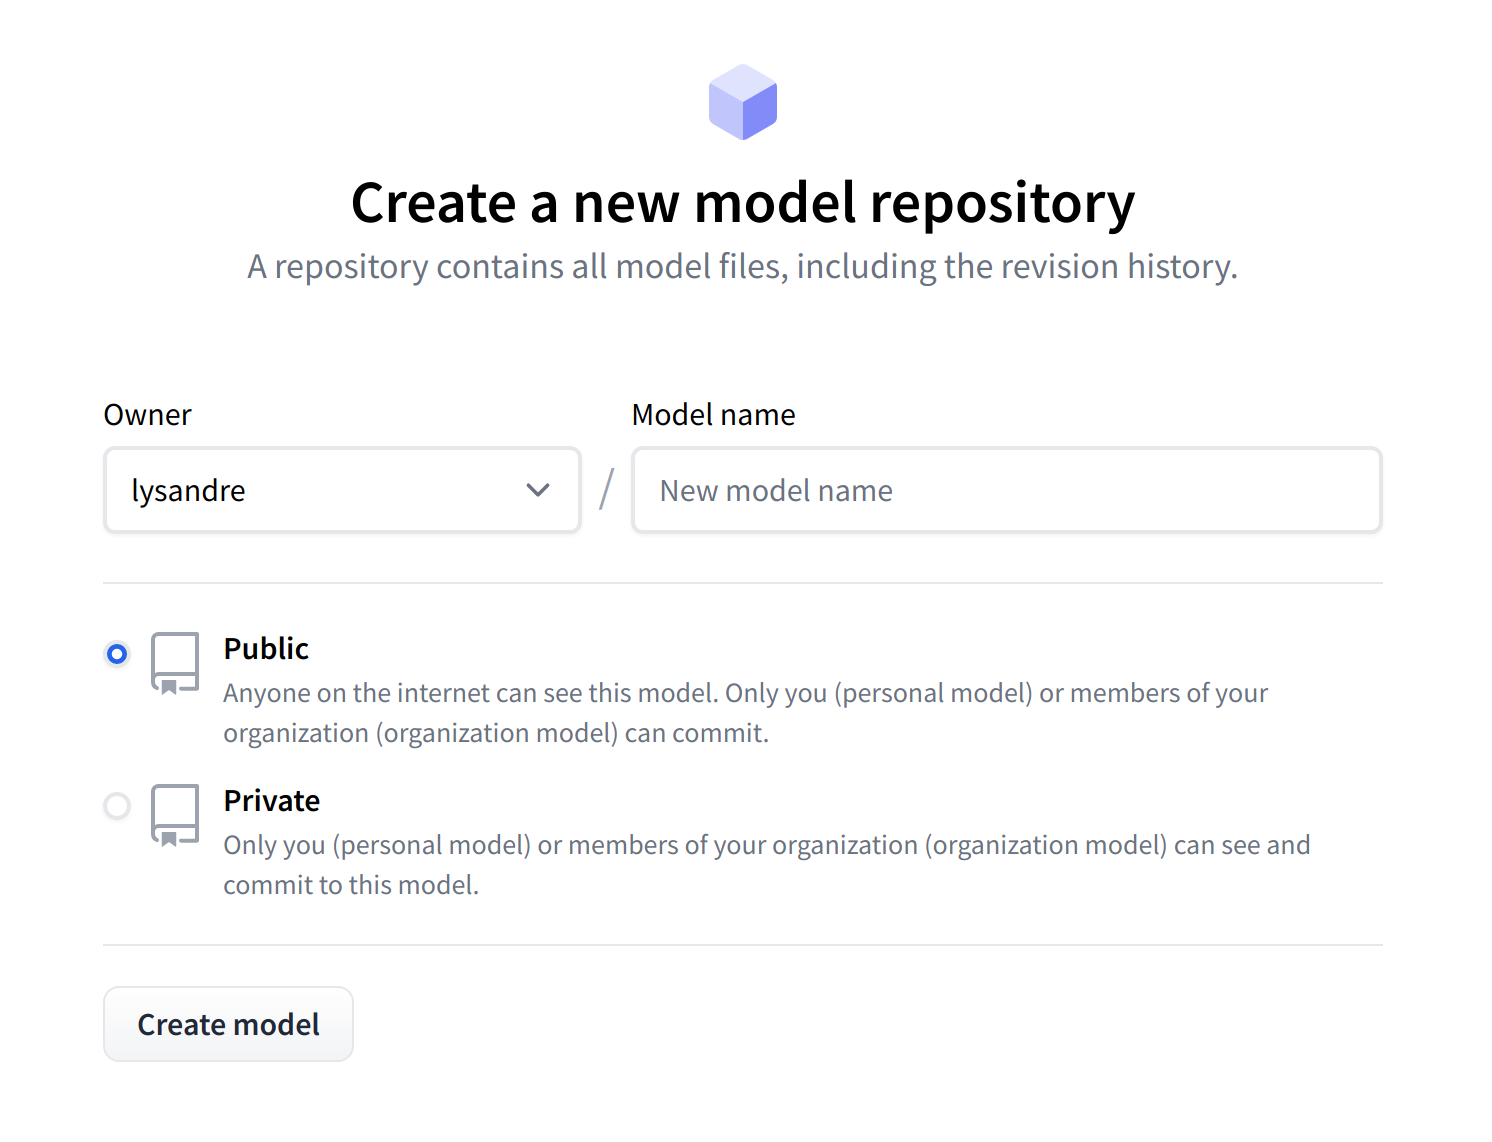

First, specify the owner of the repository: this can be either you or any of the organizations you're affiliated with. If you choose an organization, the model will be featured on the organization's page and every member of the organization will have the ability to contribute to the repository.

Next, enter your model's name. This will also be the name of the repository. Finally, you can specify whether you want your model to be public or private. Private models are hidden from public view.

After creating your model repository, you should see a page like this:

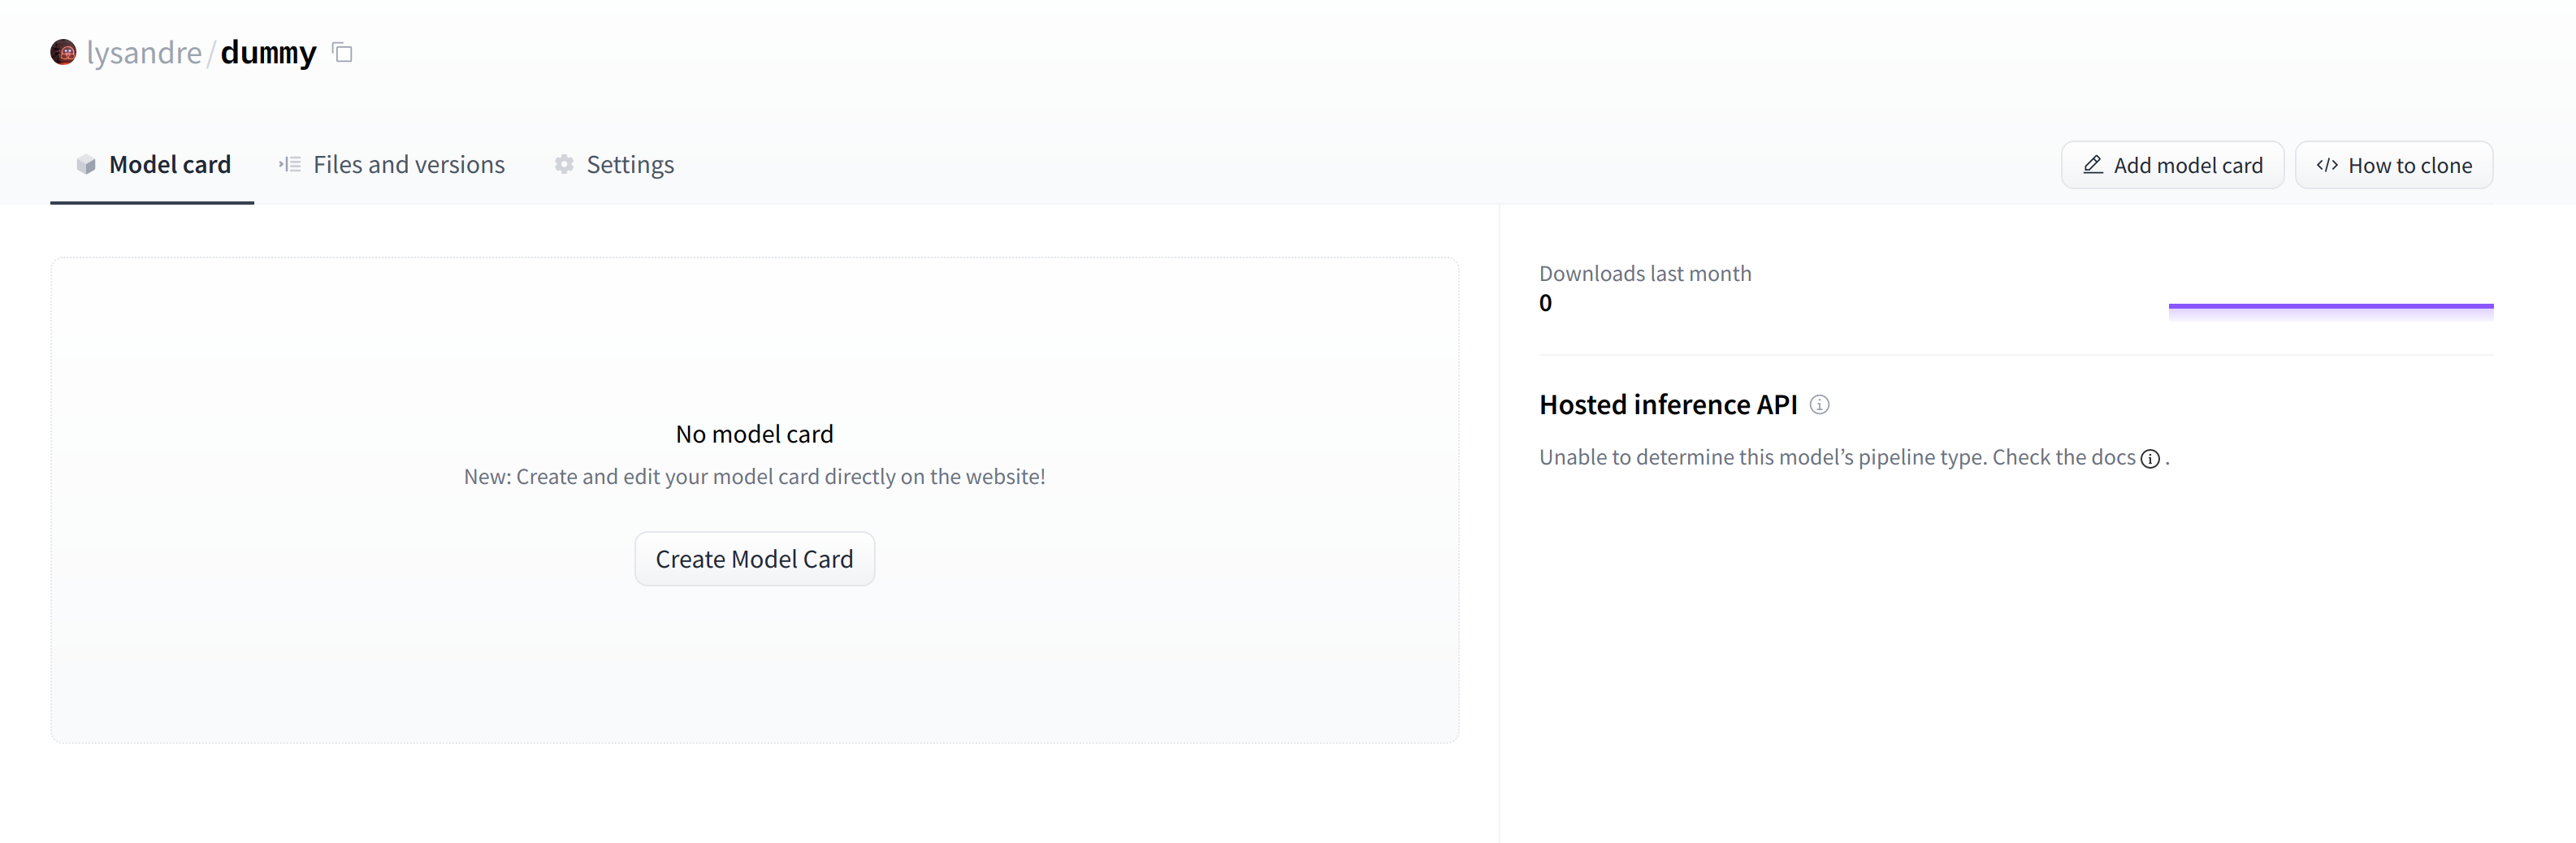

This is where your model will be hosted. To start populating it, you can add a README file directly from the web interface.

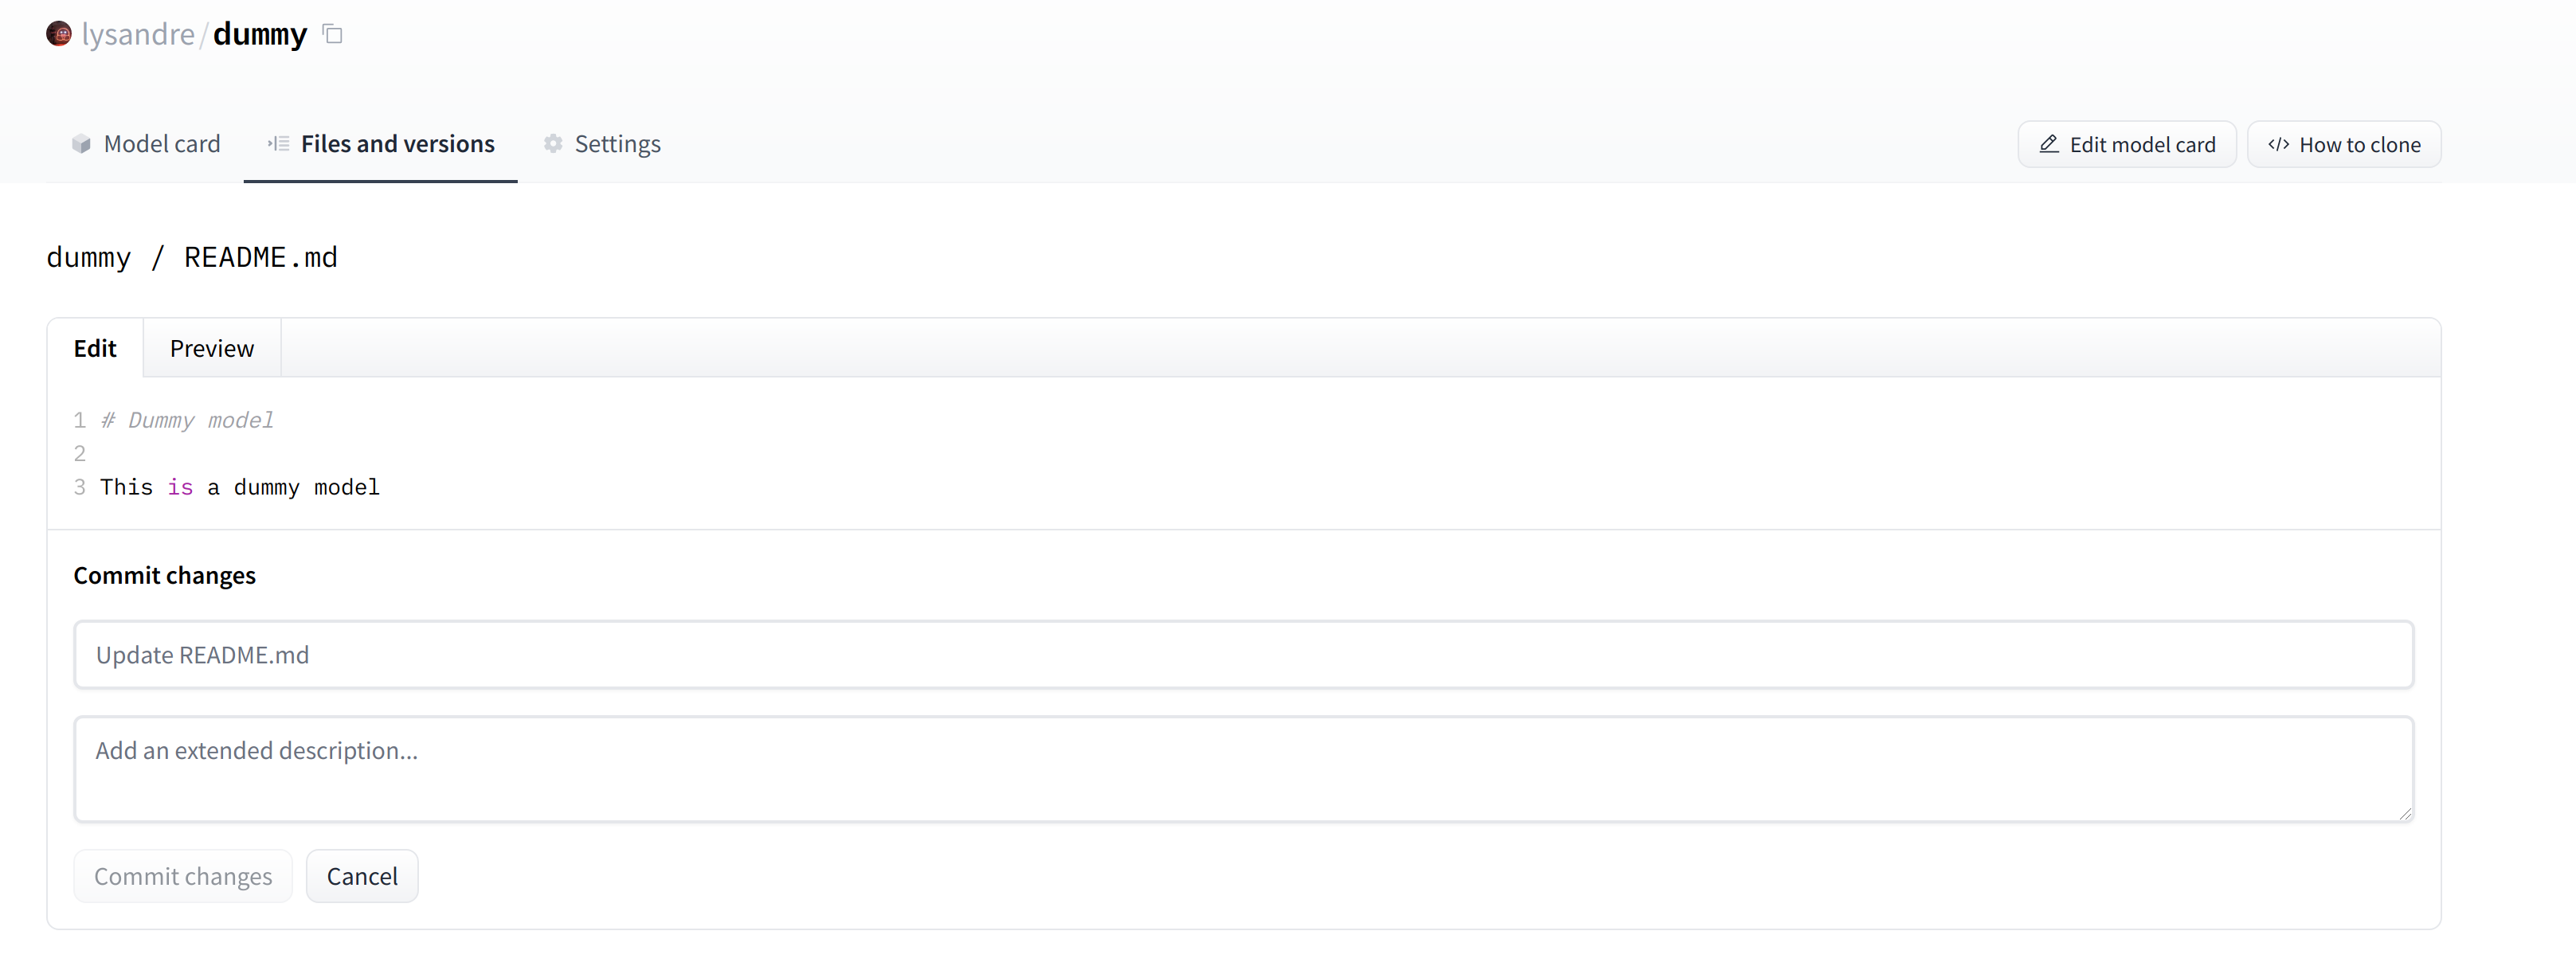

The README file is in Markdown — feel free to go wild with it! The third part of this chapter is dedicated to building a model card. These are of prime importance in bringing value to your model, as they're where you tell others what it can do.

If you look at the “Files and versions” tab, you'll see that there aren't many files there yet — just the `README.md` you just created and the `.gitattributes` file that keeps track of large files.

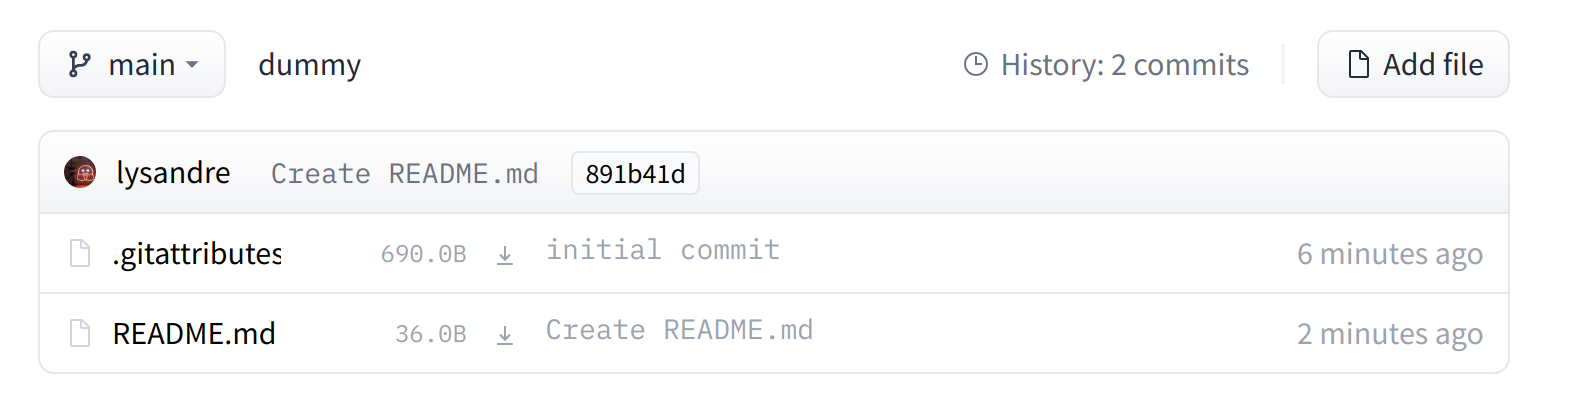

We’ll take a look at how to add some new files next.

###  Uploading the model files

The system to manage files on the Hugging Face Hub is based on git for regular files, and git-lfs (which stands for [Git Large File Storage](https://git-lfs.github.com/)) for larger files.

In the next section, we go over three different ways of uploading files to the Hub: through `huggingface_hub` and through git commands.

####  The upload_file approach

Using `upload_file` does not require git and git-lfs to be installed on your system. It pushes files directly to the 🤗 Hub using HTTP POST requests. A limitation of this approach is that it doesn't handle files that are larger than 5GB in size. If your files are larger than 5GB, please follow the two other methods detailed below.

The API may be used as follows:

In [27]:
from huggingface_hub import upload_file

upload_file(
    path_or_fileobj="/content/config.json",
    path_in_repo="config.json",
    repo_id="Axion004/dummy-model",
)

CommitInfo(commit_url='https://huggingface.co/Axion004/dummy-model/commit/4ac800a6a9e5083cb789ff308396fd5b84fbaf20', commit_message='Upload config.json with huggingface_hub', commit_description='', oid='4ac800a6a9e5083cb789ff308396fd5b84fbaf20', pr_url=None, pr_revision=None, pr_num=None)

This will upload the file `config.json` available at `<path_to_file>` to the root of the repository as `config.json`, to the `dummy-model` repository. Other arguments which may be useful are:

- `token`, if you would like to override the token stored in your cache by a given token.
- `repo_type`, if you would like to upload to a dataset or a space instead of a model. Accepted values are "dataset" and "space".

#### The Repository class

The Repository class manages a local repository in a git-like manner. It abstracts most of the pain points one may have with git to provide all features that we require.

Using this class requires having git and git-lfs installed, so make sure you have git-lfs installed (see [here](https://git-lfs.github.com/) for installation instructions) and set up before you begin.

In order to start playing around with the repository we have just created, we can start by initialising it into a local folder by cloning the remote repository:


In [29]:
from huggingface_hub import Repository

repo = Repository("my_new_repo", clone_from="Axion004/dummy-model")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'Repository' (from 'huggingface_hub.repository') is deprecated and will be removed from version '1.0'. Please prefer the http-based alternatives instead. Given its large adoption in legacy code, the complete removal is only planned on next major release.
For more details, please read https://huggingface.co/docs/huggingface_hub/concepts/git_vs_http.
  warnings.warn(warning_message, FutureWarning)
Cloning https://huggingface.co/Axion004/dummy-model into local empty directory.


Download file model.safetensors:   0%|          | 8.74k/422M [00:00<?, ?B/s]

Download file sentencepiece.bpe.model:   1%|          | 7.40k/792k [00:00<?, ?B/s]

Clean file sentencepiece.bpe.model:   0%|          | 1.00k/792k [00:00<?, ?B/s]

Clean file model.safetensors:   0%|          | 1.00k/422M [00:00<?, ?B/s]

This created the folder `my_new_repo` in our working directory. This folder only contains the `.gitattributes` file as that's the only file created when instantiating the repository through `create_repo`.

From this point on, we may leverage several of the traditional git methods:

In [35]:
# Create a new file and write some content to it
with open("my_new_repo/new_file.txt", "w") as f:
    f.write("This is a new file.")

# Pull any remote changes before adding and committing
repo.git_pull()

# Stage the new file for commit
repo.git_add("new_file.txt")

# Commit the changes with a descriptive message
repo.git_commit(commit_message="Adding a new file")

# Push the changes to the remote repository
repo.git_push()

# Optionally tag the commit
# repo.git_tag(tag_name="v1.0")  # Uncomment to tag the commit

To https://huggingface.co/Axion004/dummy-model
   4ac800a..b1dc4e4  main -> main

   4ac800a..b1dc4e4  main -> main



'https://huggingface.co/Axion004/dummy-model/commit/b1dc4e43607df4174477fafcd7f016961468a089'

And others! We recommend taking a look at the `Repository` documentation available [here](https://github.com/huggingface/huggingface_hub/tree/main/src/huggingface_hub#advanced-programmatic-repository-management) for an overview of all available methods.

At present, we have a model and a tokenizer that we would like to push to the hub. We have successfully cloned the repository, we can therefore save the files within that repository.

We first make sure that our local clone is up to date by pulling the latest changes:

In [36]:
repo.git_pull()

Once that is done, we save the model and tokenizer files:

In [37]:
model.save_pretrained("my_new_repo")
tokenizer.save_pretrained("my_new_repo")

('my_new_repo/tokenizer_config.json',
 'my_new_repo/special_tokens_map.json',
 'my_new_repo/sentencepiece.bpe.model',
 'my_new_repo/added_tokens.json',
 'my_new_repo/tokenizer.json')

The `my_new_repo` folder now contains all the model and tokenizer files. We follow the usual git workflow by adding files to the staging area, committing them and pushing them to the hub:

In [38]:
repo.git_add()
repo.git_commit("Add model and tokenizer files")
repo.git_push()

To https://huggingface.co/Axion004/dummy-model
   b1dc4e4..fc8188e  main -> main

   b1dc4e4..fc8188e  main -> main



'https://huggingface.co/Axion004/dummy-model/commit/fc8188e3669f15d80460b22c7ab14d02dba89b45'

Congratulations! You just pushed your first files on the hub.

#### The git-based approach

This is the very barebones approach to uploading files: we`ll do so with git and git-lfs directly. Most of the difficulty is abstracted away by previous approaches, but there are a few caveats with the following method so we`ll follow a more complex use-case.

Using this class requires having git and git-lfs installed, so make sure you have [git-lfs](https://git-lfs.github.com/) installed (see here for installation instructions) and set up before you begin.

First start by initializing git-lfs:

In [40]:
!git lfs install

Git LFS initialized.


Once that's done, the first step is to clone your model repository:

In [42]:
!git clone https://huggingface.co/Axion004/dummy-model

Cloning into 'dummy-model'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 28 (delta 7), reused 0 (delta 0), pack-reused 3 (from 1)
Unpacking objects: 100% (28/28), 600.46 KiB | 2.46 MiB/s, done.


I now have a folder named `dummy-model` in my working directory. I can cd into the folder and have a look at the contents:

In [45]:
!cd dummy-model && ls -larth

total 426M
drwxr-xr-x 1 root root 4.0K Jun 29 01:19 ..
-rw-r--r-- 1 root root 5.1K Jun 29 01:19 README.md
-rw-r--r-- 1 root root 1.5K Jun 29 01:19 .gitattributes
-rw-r--r-- 1 root root  701 Jun 29 01:19 config.json
-rw-r--r-- 1 root root   28 Jun 29 01:19 added_tokens.json
-rw-r--r-- 1 root root   19 Jun 29 01:19 new_file.txt
-rw-r--r-- 1 root root  374 Jun 29 01:19 special_tokens_map.json
-rw-r--r-- 1 root root 2.4M Jun 29 01:19 tokenizer.json
-rw-r--r-- 1 root root 1.8K Jun 29 01:19 tokenizer_config.json
-rw-r--r-- 1 root root 792K Jun 29 01:19 sentencepiece.bpe.model
drwxr-xr-x 3 root root 4.0K Jun 29 01:19 .
-rw-r--r-- 1 root root 423M Jun 29 01:19 model.safetensors
drwxr-xr-x 9 root root 4.0K Jun 29 01:19 .git


If you just created your repository using Hugging Face Hub's `create_repo` method, this folder should only contain a hidden `.gitattributes` file. If you followed the instructions in the previous section to create a repository using the web interface, the folder should contain a single `README.md` file alongside the hidden `.gitattributes` file, as shown here.

Adding a regular-sized file, such as a configuration file, a vocabulary file, or basically any file under a few megabytes, is done exactly as one would do it in any git-based system. However, bigger files must be registered through git-lfs in order to push them to `huggingface.co`.

Let's go back to Python for a bit to generate a model and tokenizer that we'd like to commit to our dummy repository:

In [46]:
from transformers import AutoModelForMaskedLM, AutoTokenizer

checkpoint = "camembert-base"

model = AutoModelForMaskedLM.from_pretrained(checkpoint)
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

# Do whatever with the model, train it, fine-tune it...

model.save_pretrained("dummy-model")
tokenizer.save_pretrained("dummy-model")

Some weights of the model checkpoint at camembert-base were not used when initializing CamembertForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing CamembertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


('dummy-model/tokenizer_config.json',
 'dummy-model/special_tokens_map.json',
 'dummy-model/sentencepiece.bpe.model',
 'dummy-model/added_tokens.json',
 'dummy-model/tokenizer.json')

Now that we've saved some model and tokenizer artifacts, let's take another look at the dummy folder:

In [47]:
!ls -larth dummy-model

total 426M
drwxr-xr-x 1 root root 4.0K Jun 29 01:19 ..
-rw-r--r-- 1 root root 5.1K Jun 29 01:19 README.md
-rw-r--r-- 1 root root 1.5K Jun 29 01:19 .gitattributes
-rw-r--r-- 1 root root   19 Jun 29 01:19 new_file.txt
drwxr-xr-x 3 root root 4.0K Jun 29 01:19 .
drwxr-xr-x 9 root root 4.0K Jun 29 01:19 .git
-rw-r--r-- 1 root root  701 Jun 29 01:22 config.json
-rw-r--r-- 1 root root 423M Jun 29 01:22 model.safetensors
-rw-r--r-- 1 root root 1.8K Jun 29 01:22 tokenizer_config.json
-rw-r--r-- 1 root root  374 Jun 29 01:22 special_tokens_map.json
-rw-r--r-- 1 root root   28 Jun 29 01:22 added_tokens.json
-rw-r--r-- 1 root root 792K Jun 29 01:22 sentencepiece.bpe.model
-rw-r--r-- 1 root root 2.4M Jun 29 01:22 tokenizer.json


If you look at the file sizes (for example, with `ls -lh`), you should see that the model safetensors file (`model.safetensors`) is the only outlier, at more than 400 MB.

✏️ When creating the repository from the web interface, the `.gitattributes` file is automatically set up to consider files with certain extensions, such as `.bin` and `.h5`, as large files, and git-lfs will track them with no necessary setup on your side.

We can now go ahead and proceed like we would usually do with traditional Git repositories. We can add all the files to Git's staging environment using the `git add` command:

In [71]:
# Create a new file and write some content to it
with open("dummy-model/another_file.txt", "w") as f:
    f.write("This is a another file.")

In [72]:
!cd dummy-model/ && git add *

We can then have a look at the files that are currently staged:

In [73]:
!cd dummy-model && git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   another_file.txt



Similarly, we can make sure that git-lfs is tracking the correct files by using its `status` command:

In [75]:
!cd dummy-model && git lfs status

On branch main
Objects to be pushed to origin/main:


Objects to be committed:

	another_file.txt (Git: ea399d3)

Objects not staged for commit:




We can see that all files have Git as a handler. Let's proceed to the final steps, committing and pushing to the `huggingface.co` remote repository:

In [77]:
!cd dummy-model && git commit -m "Changes to another text file"

[main 98940ab] Changes to another text file
 1 file changed, 1 insertion(+)
 create mode 100644 another_file.txt


Pushing can take a bit of time, depending on the speed of your internet connection and the size of your files:

In [78]:
!cd dummy-model && git push

Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (2/2), done.
Writing objects: 100% (3/3), 314 bytes | 314.00 KiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
To https://huggingface.co/Axion004/dummy-model
   fc8188e..98940ab  main -> main


If we take a look at the model repository when this is finished, we can see all the recently added files:

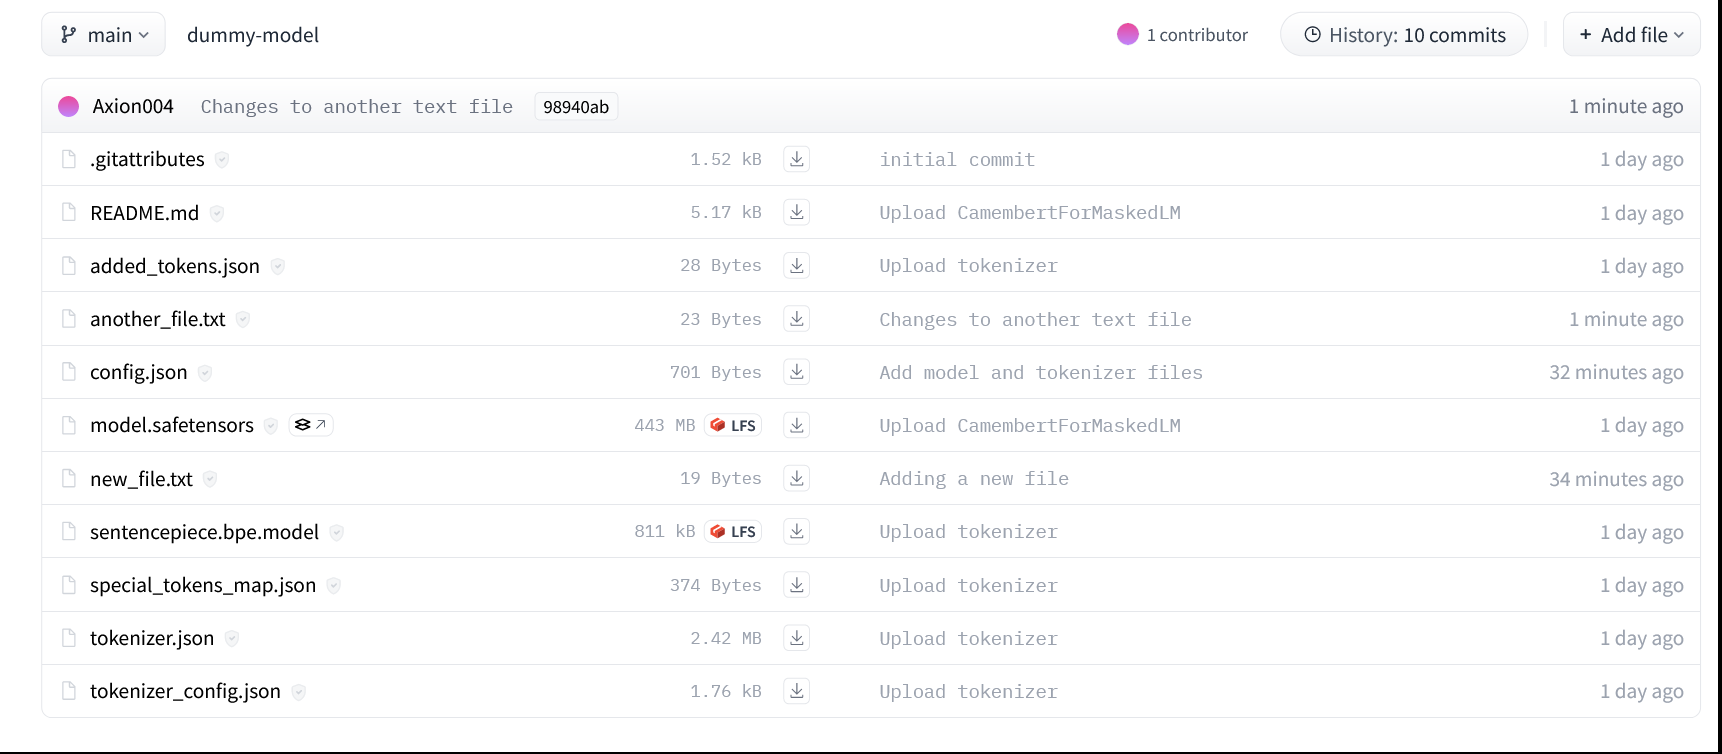

The UI allows you to explore the model files and commits and to see the diff introduced by each commit:

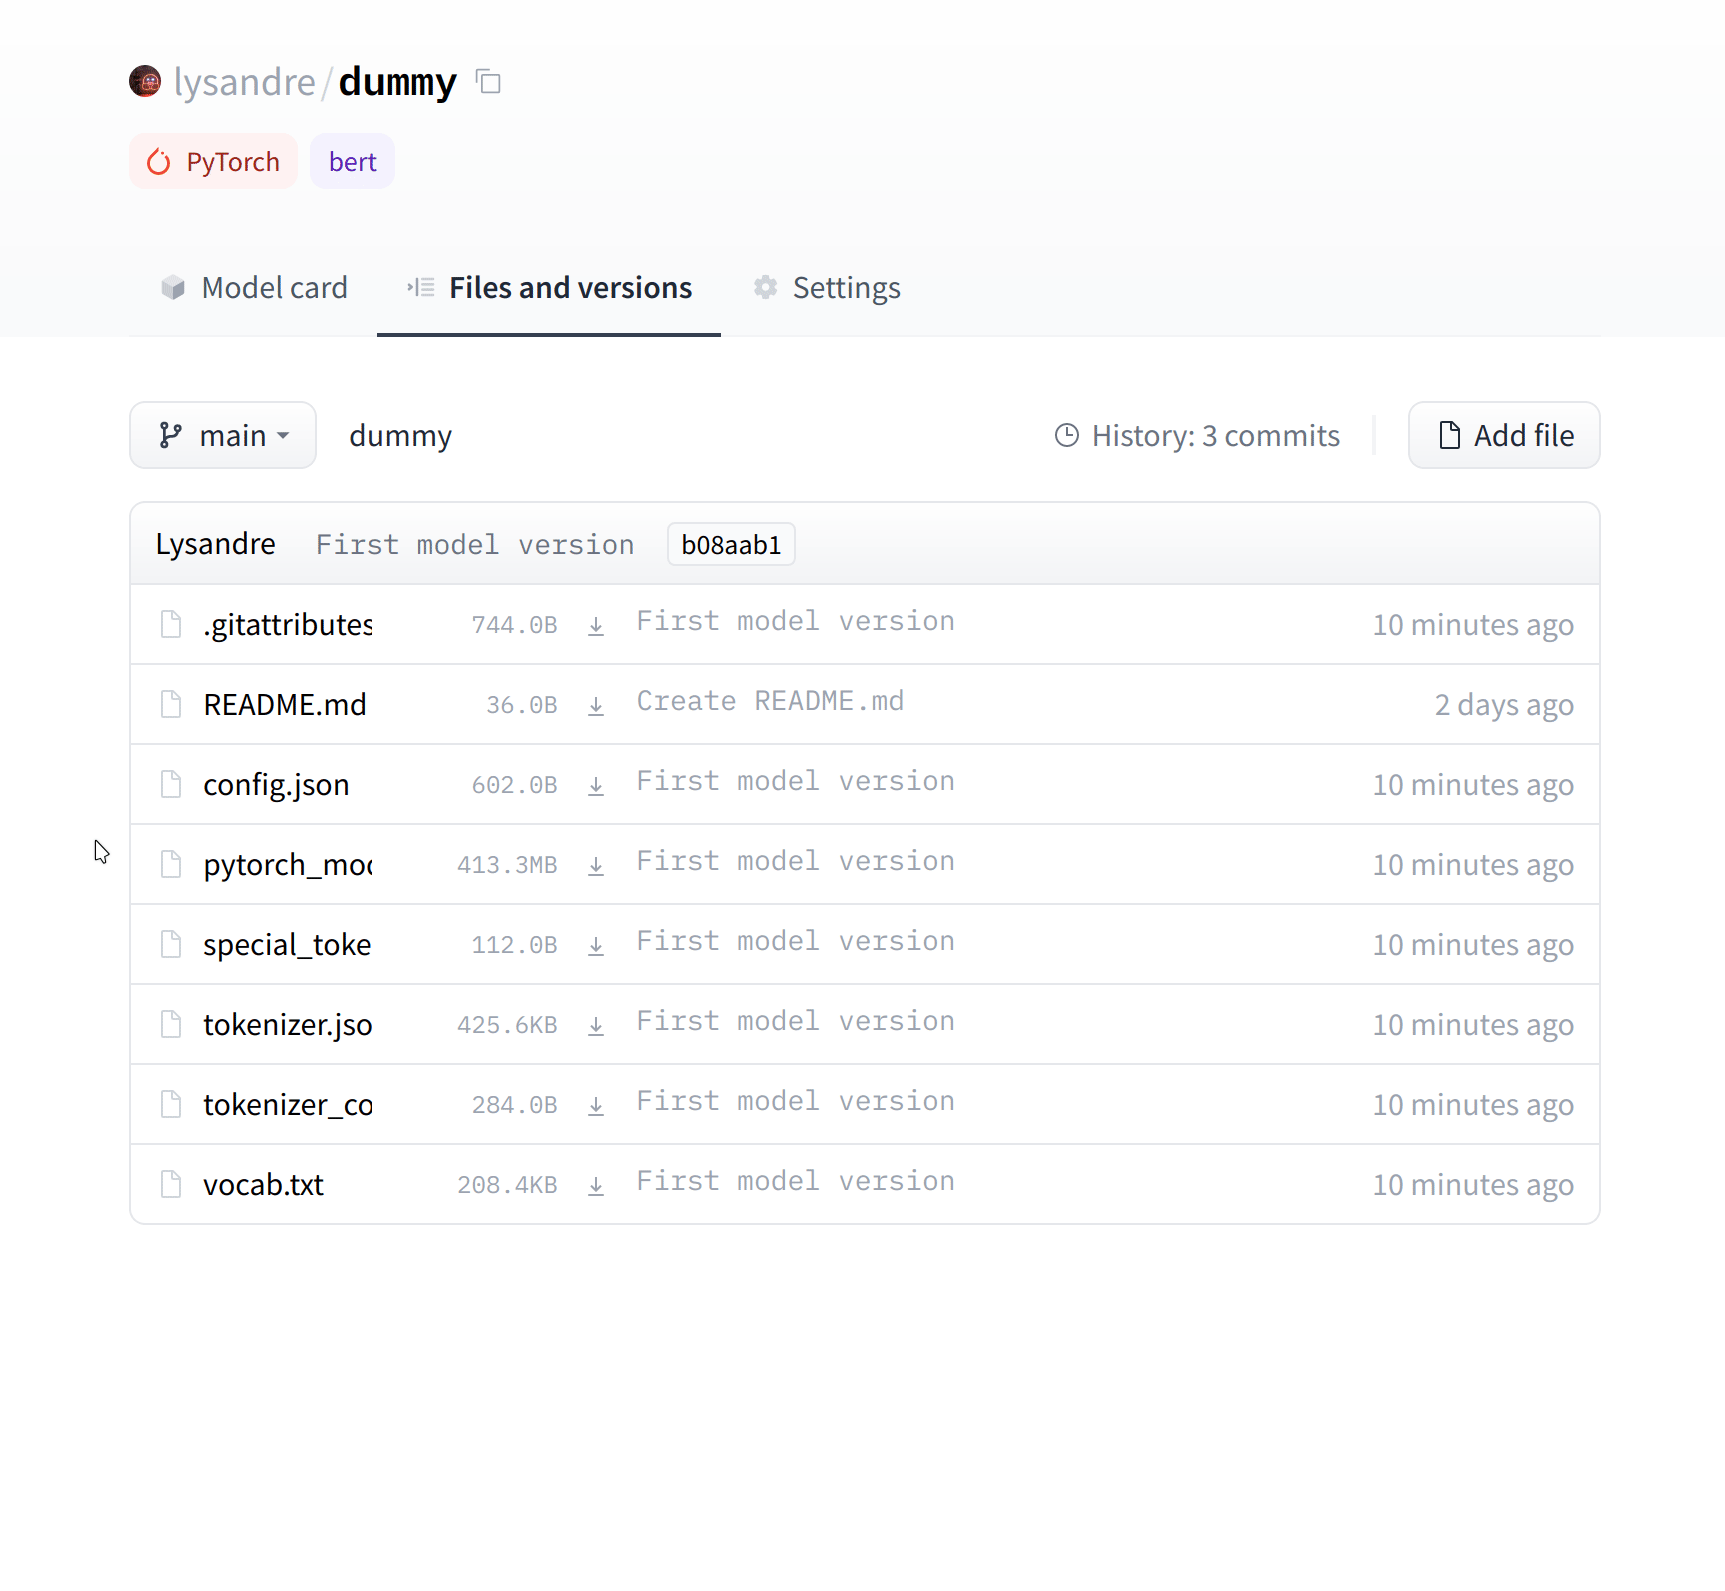